## Table of Contents
* [Chapter 1](#chapter1) : Introduction to Data Mining
* [Chapter 2](#chapter2) : Basics of data processing
* [Chapter 3](#chapter3) : Feature selection

# Libraries 

In [169]:
#library that allows the importation of images 
from IPython.display import Image
#Lab 2
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib as mlp
%matplotlib inline
#Lab 3
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from mrmr import mrmr_classif
from sklearn.neighbors import KNeighborsClassifier

# Lab 1 : Introduction to Data Mining<a class="anchor" id="chapter1"></a>

Based on the average level and experience of the group we figured it might be best to go for a nominal dataset as it will let us get a better feel of the models and will be easier to navigate during data exploration. And maybe if possible later on, when we would want to do extra work we’ll do a bit of deep learning with an image dataset.

## Dataset selection :
During our research we managed to shortlist 3 datasets :
- Medical Cost Personal Datasets : https://www.kaggle.com/datasets/mirichoi0218/insurance 
- Corona Virus Covid-19 US Counties : https://www.kaggle.com/datasets/yasirabdaali/corona-virus-covid19-us-counties
- World happiness report :
    - https://www.kaggle.com/datasets/unsdsn/world-happiness (years : 2015-2016-2017-2018-2019)
    - https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021?select=world-happiness-report-2021.csv (year 2021)

### Medical Cost Personal Datasets :
This dataset contains the medical costs billed by health insurance in the US with information on those billed. 
- Pros :
    - simple dataset so it's easy to work with (good for beginners)
    - Clean dataset
- Cons :
    - it isn't that big of a dataset
    - Lack of interesting visualisation since there isn't time or space variation 

### Corona Virus Covid-19 US Counties
This dataset contains the covid-19 pandemic data of the years 2020, 2021 and 2022 of several counties in the United States.
- Pros :
    - Time and space variation so more opportunities for visualisation 
    - A dataset that allows preprocessing training
- Cons :
    - redundant for a portfolio since there are too many projects with covid 

### World happiness report
The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. 

The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors **economic production, social support, life expectancy, freedom, absence of corruption, and generosity** contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

- Pros :
    - Time and space variation so more opportunities for visualisation 
    - Big dataset which will come on handy when creating smaller datasets from it
    - The context is interesting and new and so the conlusions and it allows for good analysis training
- Cons :
    - might be more suitable for some models over others (but that seemed to be a general problem with all datasets)
    - Clean data so not much preprocessing 

We ended up choosing the the world happines report affter discussing everyone's experience and level in both python and machine learning. We settled on a dataset that wasn't as complicated as an image dataset but still interesting and challenging enough for thorough training, as well as one that would guarantee a good portflio as a result. 

#### Features : (final dataset after merge)

- Happiness Rank : Rank of any country in a particular year.
- Country : Name of the country.
- Happiness Score : the sum of all numerical columns in the datasets.
- Perceptions of corruption : A quantification of the people’s perceived trust in their governments.
- Generosity : Numerical value estimated based on the perception of Generosity experienced by poll takers in their country.
- Social Support : Metric estimating satisfaction of people with their friends and family.
- Freedom to make life choices : Perception of freedom quantified.
- Life Expectancy : Life Expectancy quantified 

# Lab 2 : Basics of Data Processing<a class="anchor" id="chapter2"></a> 

We start by importing the different data csv files we have from Kaggle :

In [4]:
data2015 = pd.read_csv("2015.csv")
data2016 = pd.read_csv("2016.csv")
data2017 = pd.read_csv("2017.csv")
data2018 = pd.read_csv("2018.csv") 
data2019 = pd.read_csv("2019.csv")
data2021= pd.read_csv("world-happiness-report-2021.csv")

## Data exploration :

In [5]:
data2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
data2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [7]:
data2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [8]:
data2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [9]:
data2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [10]:
data2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [11]:
data2015.shape

(158, 12)

In [12]:
data2016.shape

(157, 13)

In [13]:
data2017.shape

(155, 12)

In [14]:
data2018.shape

(156, 9)

In [15]:
data2019.shape

(156, 9)

In [16]:
data2021.shape

(149, 20)

In [17]:
data2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [18]:
data2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [19]:
data2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [20]:
data2018.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [21]:
data2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [22]:
data2021.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

As we've noticed from the results of the **.shape()** function, the datasets for different years don't seem to have the same number of columns and there is also a variation in the names. We will have to normalize the columns and their names in a later section.

In [23]:
data2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [24]:
data2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [25]:
data2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [26]:
data2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [27]:
data2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [28]:
data2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

As we will be mostly working with numerical values besides the country and region, there will be no need to use encoding for the categotical attributes.

Next we'll be checking for duplicates in the datasets :

In [29]:
data2015.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

In [30]:
data2016.nunique()

Country                          157
Region                            10
Happiness Rank                   154
Happiness Score                  154
Lower Confidence Interval        154
Upper Confidence Interval        154
Economy (GDP per Capita)         157
Family                           157
Health (Life Expectancy)         156
Freedom                          157
Trust (Government Corruption)    156
Generosity                       157
Dystopia Residual                157
dtype: int64

In [31]:
data2017.nunique()

Country                          155
Happiness.Rank                   155
Happiness.Score                  151
Whisker.high                     155
Whisker.low                      155
Economy..GDP.per.Capita.         155
Family                           155
Health..Life.Expectancy.         155
Freedom                          155
Generosity                       155
Trust..Government.Corruption.    155
Dystopia.Residual                155
dtype: int64

In [32]:
data2018.nunique()

Overall rank                    156
Country or region               156
Score                           154
GDP per capita                  147
Social support                  146
Healthy life expectancy         143
Freedom to make life choices    136
Generosity                      122
Perceptions of corruption       110
dtype: int64

In [33]:
data2019.nunique()

Overall rank                    156
Country or region               156
Score                           155
GDP per capita                  146
Social support                  145
Healthy life expectancy         119
Freedom to make life choices    130
Generosity                      118
Perceptions of corruption       113
dtype: int64

In [34]:
data2021.nunique()

Country name                                  149
Regional indicator                             10
Ladder score                                  147
Standard error of ladder score                 65
upperwhisker                                  146
lowerwhisker                                  143
Logged GDP per capita                         148
Social support                                119
Healthy life expectancy                       135
Freedom to make life choices                  126
Generosity                                    130
Perceptions of corruption                     130
Ladder score in Dystopia                        1
Explained by: Log GDP per capita              138
Explained by: Social support                  135
Explained by: Healthy life expectancy         119
Explained by: Freedom to make life choices    130
Explained by: Generosity                      119
Explained by: Perceptions of corruption       117
Dystopia + residual                           142


In [35]:
data2021['Ladder score in Dystopia'].unique()

array([2.43])

Since the only variable that has to be really unique is the country we can say that we don't have any duplicates in most of our dataframes. The exception would be the column "Ladder score in Dystopia" in the dataframe for the year 2021 that only has one value and therfore can be dropped since it serves no value in our analysis and comparasion between countries. 

In [36]:
#drop column
data2021.drop('Ladder score in Dystopia', axis=1, inplace=True)

Next we check missing values :

In [37]:
data2015.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [38]:
data2016.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [39]:
data2017.isnull().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [40]:
data2018.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

In [41]:
data2019.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [42]:
data2021.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

There is one missing value in the 2018 dataframe :

In [43]:
data2018[data2018['Perceptions of corruption'].isna()]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


We need to get the mean value for all the other years to replace the missing value, we will do that once we concatenate all the dataframes into one dataset.

## Final dataset 

In [44]:
print('Year 2015 has {} rows and {} columns'.format(data2015.shape[0], data2015.shape[1]))
print('Year 2016 has {} rows and {} columns'.format(data2016.shape[0], data2016.shape[1]))
print('Year 2017 has {} rows and {} columns'.format(data2017.shape[0], data2017.shape[1]))
print('Year 2018 has {} rows and {} columns'.format(data2018.shape[0], data2018.shape[1]))
print('Year 2019 has {} rows and {} columns'.format(data2019.shape[0], data2019.shape[1]))
print('Year 2021 has {} rows and {} columns'.format(data2021.shape[0], data2021.shape[1]))

Year 2015 has 158 rows and 12 columns
Year 2016 has 157 rows and 13 columns
Year 2017 has 155 rows and 12 columns
Year 2018 has 156 rows and 9 columns
Year 2019 has 156 rows and 9 columns
Year 2021 has 149 rows and 19 columns


We start byrenaming the columns and using standard names for all the dataframes :

In [45]:
data2015.rename(columns = {'Economy (GDP per Capita)': 'GDP per Capita',
                        'Family' : 'Social support',
                        'Health (Life Expectancy)' : 'Life Expectancy',
                         'Health (Life Expectancy)' : 'Life Expectancy',  
                       'Freedom': 'Freedom to make life choices',
                        'Trust (Government Corruption)': 'Perceptions of corruption'
                          }, inplace = True)

In [47]:
data2016.rename(columns = {'Economy (GDP per Capita)': 'GDP per Capita',
                        'Family' : 'Social support',
                        'Health (Life Expectancy)' : 'Life Expectancy',  
                       'Freedom': 'Freedom to make life choices',
                        'Trust (Government Corruption)': 'Perceptions of corruption'
                          }, inplace = True)

In [48]:
data2017.rename(columns = {'Happiness.Rank': 'Happiness Rank',
                           'Happiness.Score': 'Happiness Score',
    'Economy..GDP.per.Capita.': 'GDP per Capita',
                        'Family' : 'Social support',
                        'Health..Life.Expectancy.' : 'Life Expectancy',  
                       'Freedom': 'Freedom to make life choices',
                           'Dystopia.Residual':'Dystopia Residual',
                        'Trust..Government.Corruption.': 'Perceptions of corruption'
                          }, inplace = True)

In [49]:
data2018.rename(columns = {'Overall rank': 'Happiness Rank',
                           'Country or region' : 'Country',
                           'GDP per capita': 'GDP per Capita',
                           'Score': 'Happiness Score',
                        'Healthy life expectancy' : 'Life Expectancy',
                          }, inplace = True)

In [50]:
data2019.rename(columns = {'Overall rank': 'Happiness Rank',
                           'Country or region' : 'Country',
                            'GDP per capita': 'GDP per Capita',                          
                           'Score': 'Happiness Score',
                        'Healthy life expectancy' : 'Life Expectancy',  
                          }, inplace = True)

In [51]:
data2021.drop(['Social support','Generosity','Perceptions of corruption','Freedom to make life choices'], axis=1, inplace=True)

In [52]:
data2021['Happiness Rank'] = data2021['Ladder score'].rank(ascending=False)

In [53]:
data2021.rename(columns = {'Ladder score': 'Happiness Score',
                           'Country name':'Country',
                           'Regional indicator':'Region',
                         'Explained by: Log GDP per capita': 'GDP per Capita',
                        'Explained by: Healthy life expectancy' : 'Life Expectancy',
                        'Explained by: Social support' : 'Social support', 
                       'Explained by: Freedom to make life choices': 'Freedom to make life choices',
                           'Explained by: Generosity':'Generosity',
                        'Explained by: Perceptions of corruption': 'Perceptions of corruption',                           
                           'Dystopia + residual':'Dystopia Residual'                       
                          }, inplace = True)

Next, we'll be keeeping the common attributes across the dataframes :

In [46]:
data2015 = data2015.filter(['Country', 'Happiness Rank', 'Happiness Score', 'GDP per Capita','Social support',
                        'Life Expectancy', 'Freedom to make life choices', 'Perceptions of corruption','Generosity'
                         ])

In [54]:
data2016 = data2016.filter(['Country', 'Happiness Rank', 'Happiness Score', 'GDP per Capita','Social support',
                        'Life Expectancy', 'Freedom to make life choices', 'Perceptions of corruption','Generosity'
                         ])

In [55]:
data2017 = data2017.filter(['Country', 'Happiness Rank', 'Happiness Score', 'GDP per Capita','Social support',
                        'Life Expectancy', 'Freedom to make life choices', 'Perceptions of corruption','Generosity'
                         ])

In [56]:
data2018 = data2018.filter(['Country', 'Happiness Rank', 'Happiness Score', 'GDP per Capita','Social support',
                        'Life Expectancy', 'Freedom to make life choices', 'Perceptions of corruption','Generosity'
                         ])

In [57]:
data2019 = data2019.filter(['Country', 'Happiness Rank', 'Happiness Score', 'GDP per Capita','Social support',
                        'Life Expectancy', 'Freedom to make life choices', 'Perceptions of corruption','Generosity'
                         ])

In [58]:
data2021 = data2021.filter(['Country', 'Happiness Rank', 'Happiness Score', 'GDP per Capita','Social support',
                        'Life Expectancy', 'Freedom to make life choices', 'Perceptions of corruption','Generosity'
                         ])

In [59]:
#convert from float to integer
data2021["Happiness Rank"]=data2021["Happiness Rank"].apply(np.int64)

In [60]:
print('Year 2015 has {} rows and {} columns'.format(data2015.shape[0], data2015.shape[1]))
print('Year 2016 has {} rows and {} columns'.format(data2016.shape[0], data2016.shape[1]))
print('Year 2017 has {} rows and {} columns'.format(data2017.shape[0], data2017.shape[1]))
print('Year 2018 has {} rows and {} columns'.format(data2018.shape[0], data2018.shape[1]))
print('Year 2019 has {} rows and {} columns'.format(data2019.shape[0], data2019.shape[1]))
print('Year 2021 has {} rows and {} columns'.format(data2021.shape[0], data2021.shape[1]))

Year 2015 has 158 rows and 9 columns
Year 2016 has 157 rows and 9 columns
Year 2017 has 155 rows and 9 columns
Year 2018 has 156 rows and 9 columns
Year 2019 has 156 rows and 9 columns
Year 2021 has 149 rows and 9 columns


Now we have all our dataframes with the same attributes and normalized names for each one. The next step would be to add a new attribute "year" in preparation for the dataframe merge :

In [61]:
data2015.insert(0, "Year", 2015)

In [62]:
data2016.insert(0, "Year", 2016)

In [63]:
data2017.insert(0, "Year", 2017)

In [64]:
data2018.insert(0, "Year", 2018)

In [65]:
data2019.insert(0, "Year", 2019)

In [66]:
data2021.insert(0, "Year", 2021)

Now to merge the dataframes using an inner join on the country column :

In [67]:
data = pd.concat([data2015, data2016,data2017, data2018,data2019,data2021], axis=0)

In [68]:
data.shape

(931, 10)

In [69]:
data.head()

,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Social support,Life Expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,2015,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2015,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2015,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,2015,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,2015,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


Since we have our complete dataset we can deal with the missing value that we'd detected prior :

In [70]:
data.isnull().sum()

Year                            0
Country                         0
Happiness Rank                  0
Happiness Score                 0
GDP per Capita                  0
Social support                  0
Life Expectancy                 0
Freedom to make life choices    0
Perceptions of corruption       1
Generosity                      0
dtype: int64

In [71]:
UAE = data[data['Country'] == 'United Arab Emirates']

In [72]:
a = UAE['Perceptions of corruption'].mean()

In [73]:
data.fillna(a, inplace=True)

In [74]:
data.isnull().sum()

Year                            0
Country                         0
Happiness Rank                  0
Happiness Score                 0
GDP per Capita                  0
Social support                  0
Life Expectancy                 0
Freedom to make life choices    0
Perceptions of corruption       0
Generosity                      0
dtype: int64

Now that the data is clean, we can export the reulting dataframe as a csv file for later use :

In [75]:
data.to_csv('final.csv')

## Data vizualisaion :

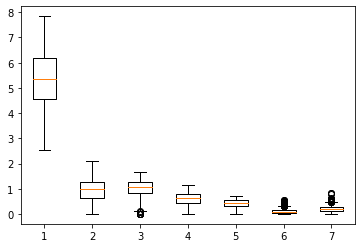

In [76]:
HappinessScore= data['Happiness Score']
GDPperCapita= data['GDP per Capita']
Socialsupport= data['Social support']
LifeExpectancy= data['Life Expectancy']
Freedomtomakelifechoices= data['Freedom to make life choices']
Perceptionsofcorruption= data['Perceptions of corruption']
Generosity= data['Generosity']

columns = [HappinessScore, GDPperCapita, Socialsupport, LifeExpectancy,
           Freedomtomakelifechoices,Perceptionsofcorruption,Generosity ]

fig, ax = plt.subplots()
ax.boxplot(columns)
plt.show()

Despite having some outliers in certain variables, it was expected since the dataset studies the differences between countries and a stark difference between countries with the highest and lowest happiness scores isn't suprising. Removing said outliers would be beating against the purpose of the dataset.

###  Happiest countries over the years :

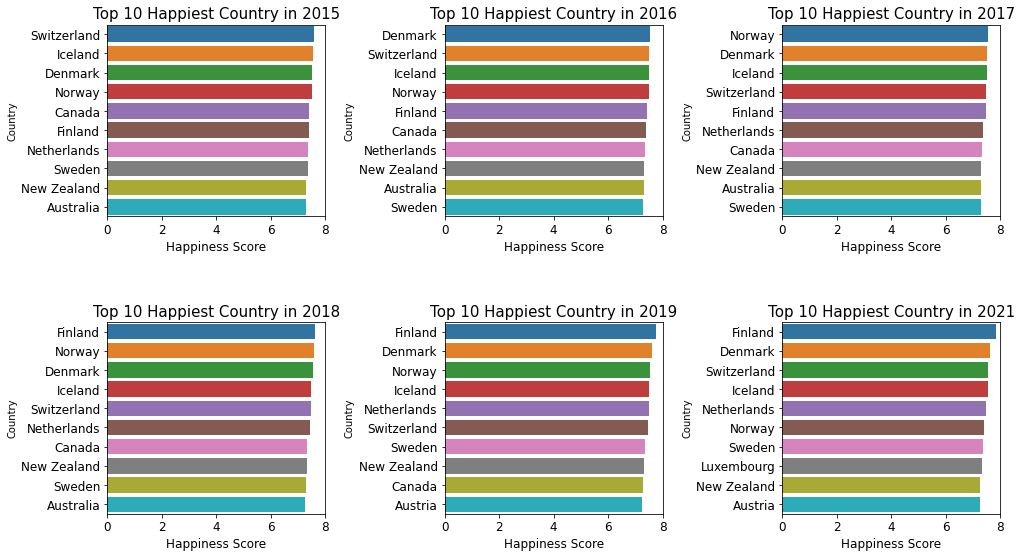

In [77]:
gp_15 = data.loc[data.Year == 2015, ['Happiness Score', 'Country']].sort_values(by = 'Happiness Score', ascending = False)[:10]
gp_16 = data.loc[data.Year == 2016, ['Happiness Score', 'Country']].sort_values(by = 'Happiness Score', ascending = False)[:10]
gp_17 = data.loc[data.Year == 2017, ['Happiness Score', 'Country']].sort_values(by = 'Happiness Score', ascending = False)[:10]
gp_18 = data.loc[data.Year == 2018, ['Happiness Score', 'Country']].sort_values(by = 'Happiness Score', ascending = False)[:10]
gp_19 = data.loc[data.Year == 2019, ['Happiness Score', 'Country']].sort_values(by = 'Happiness Score', ascending = False)[:10]
gp_21 = data.loc[data.Year == 2021, ['Happiness Score', 'Country']].sort_values(by = 'Happiness Score', ascending = False)[:10]

plt.figure(figsize=(16,9))
plt.subplot(231)
sns.barplot(x = 'Happiness Score', y = 'Country', data = gp_15)
plt.title('Top 10 Happiest Country in 2015', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 8)
plt.xlabel('Happiness Score',size = 12)


plt.subplot(232)
sns.barplot(x = 'Happiness Score', y = 'Country', data = gp_16)
plt.title('Top 10 Happiest Country in 2016', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 8)
plt.xlabel('Happiness Score',size = 12)


plt.subplot(233)
sns.barplot(x = 'Happiness Score', y = 'Country', data = gp_17)
plt.title('Top 10 Happiest Country in 2017', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 8)
plt.xlabel('Happiness Score',size = 12)


plt.subplot(234)
sns.barplot(x = 'Happiness Score', y = 'Country', data = gp_18)
plt.title('Top 10 Happiest Country in 2018', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 8)
plt.xlabel('Happiness Score',size = 12)

plt.subplot(235)
sns.barplot(x = 'Happiness Score', y = 'Country', data = gp_19)
plt.title('Top 10 Happiest Country in 2019', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 8)
plt.xlabel('Happiness Score',size = 12)

plt.subplot(236)
sns.barplot(x = 'Happiness Score', y = 'Country', data = gp_21)
plt.title('Top 10 Happiest Country in 2021', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 8)
plt.xlabel('Happiness Score',size = 12)

plt.subplots_adjust(hspace=0.55,wspace=0.55)
plt.show()

In the plots above we see that most of the countries maintained a spot in the top 10 throughout the 6 years with a score between 7 and 8. Unsurprisingly, the nordic countries dominate this ranking which correlates with their reputation of having good healthcare, education system and social system.

### Least happy countries over the years :

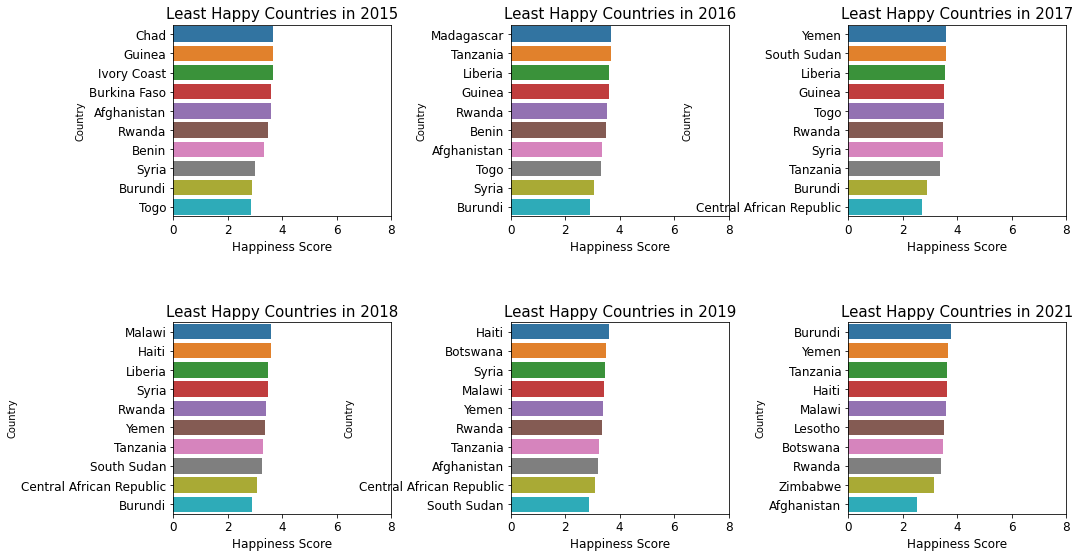

In [78]:
gps_15 = data.loc[data.Year == 2015, ['Happiness Score', 'Country']].sort_values(by = 'Happiness Score', ascending = False)[-10:]
gps_16 = data.loc[data.Year == 2016, ['Happiness Score', 'Country']].sort_values(by = 'Happiness Score', ascending = False)[-10:]
gps_17 = data.loc[data.Year == 2017, ['Happiness Score', 'Country']].sort_values(by = 'Happiness Score', ascending = False)[-10:]
gps_18 = data.loc[data.Year == 2018, ['Happiness Score', 'Country']].sort_values(by = 'Happiness Score', ascending = False)[-10:]
gps_19 = data.loc[data.Year == 2019, ['Happiness Score', 'Country']].sort_values(by = 'Happiness Score', ascending = False)[-10:]
gps_21 = data.loc[data.Year == 2021, ['Happiness Score', 'Country']].sort_values(by = 'Happiness Score', ascending = False)[-10:]

plt.figure(figsize=(16,9))
plt.subplot(231)
sns.barplot(x = 'Happiness Score', y = 'Country', data = gps_15)
plt.title('Least Happy Countries in 2015', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 8)
plt.xlabel('Happiness Score',size = 12)


plt.subplot(232)
sns.barplot(x = 'Happiness Score', y = 'Country', data = gps_16)
plt.title('Least Happy Countries in 2016', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 8)
plt.xlabel('Happiness Score',size = 12)


plt.subplot(233)
sns.barplot(x = 'Happiness Score', y = 'Country', data = gps_17)
plt.title('Least Happy Countries in 2017', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 8)
plt.xlabel('Happiness Score',size = 12)


plt.subplot(234)
sns.barplot(x = 'Happiness Score', y = 'Country', data = gps_18)
plt.title('Least Happy Countries in 2018', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 8)
plt.xlabel('Happiness Score',size = 12)

plt.subplot(235)
sns.barplot(x = 'Happiness Score', y = 'Country', data = gps_19)
plt.title('Least Happy Countries in 2019', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 8)
plt.xlabel('Happiness Score',size = 12)


plt.subplot(236)
sns.barplot(x = 'Happiness Score', y = 'Country', data = gps_21)
plt.title('Least Happy Countries in 2021', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 8)
plt.xlabel('Happiness Score',size = 12)

plt.subplots_adjust(hspace=0.55,wspace=0.55)
plt.show()


On the other hand, the last 10 countries maintained a score under 4 all throughout the 6 years. Unlike the top 10 there seemes to be variation in the countries on this list, most likely due to various world events or catastrophes. These countries have a fragile economy as well so they're affected by the flactuation of the 1st world's countries significantly. Of course another reason for these countries low scores is the fact most were or still are in a state of war, like for example syria.

### Relationship between the attributes and the happiness score :

#### Scatter plot :
We used a scatter plot to identify the relationship of the data with each variable (i.e, correlation, or trend patterns.)

Text(0, 0.5, 'Score')

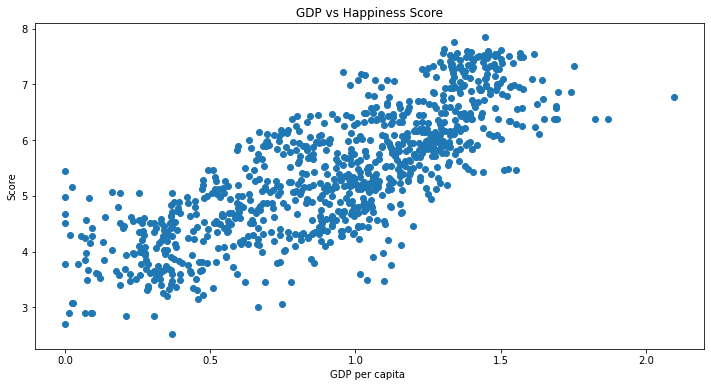

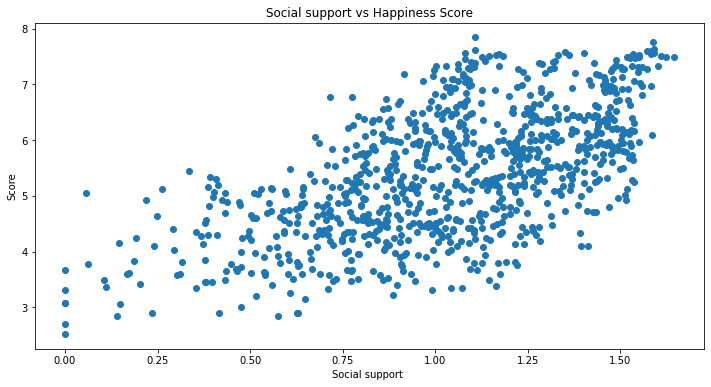

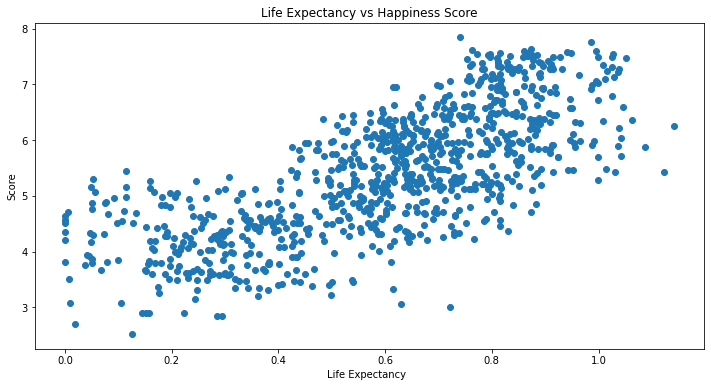

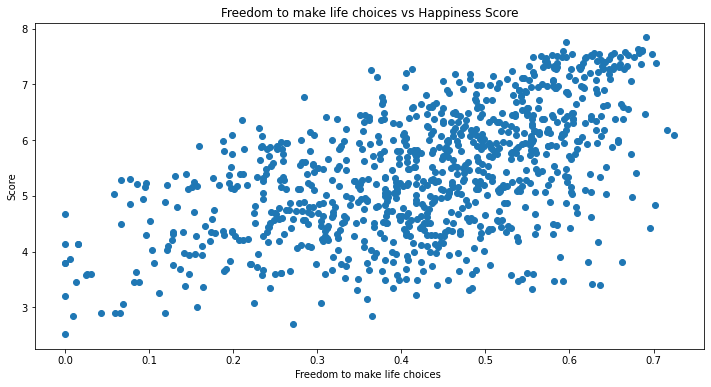

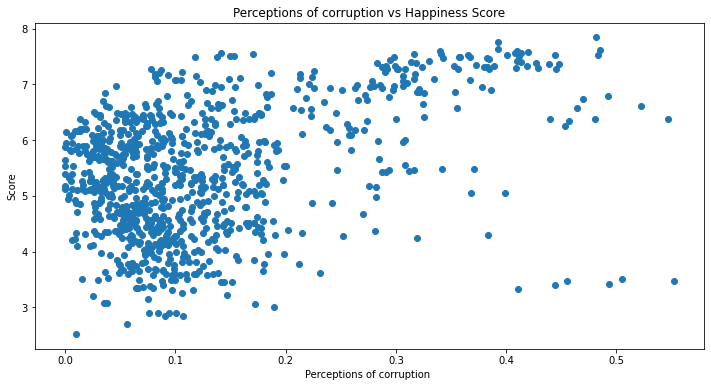

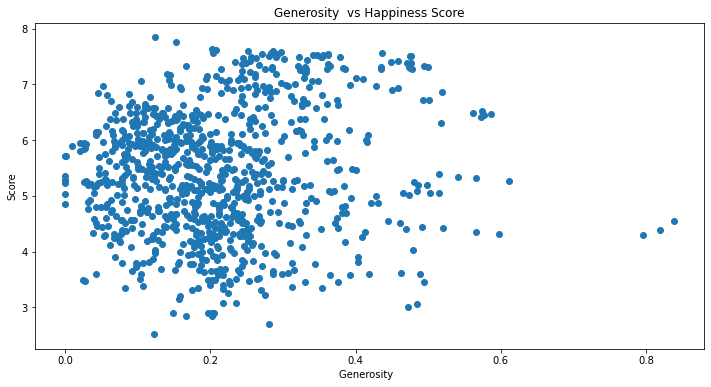

In [79]:
fig, ax = plt.subplots(figsize = (12,6))
x = data["GDP per Capita"]
y = data["Happiness Score"]
plt.scatter(x,y)
plt.title('GDP vs Happiness Score')
plt.xlabel('GDP per capita ')
plt.ylabel('Score')

fig, ax = plt.subplots(figsize = (12,6))
x = data["Social support"]
y = data["Happiness Score"]
plt.scatter(x,y)
plt.title('Social support vs Happiness Score')
plt.xlabel('Social support ')
plt.ylabel('Score')

fig, ax = plt.subplots(figsize = (12,6))
x = data["Life Expectancy"]
y = data["Happiness Score"]
plt.scatter(x,y)
plt.title('Life Expectancy vs Happiness Score')
plt.xlabel('Life Expectancy  ')
plt.ylabel('Score')

fig, ax = plt.subplots(figsize = (12,6))
x = data["Freedom to make life choices"]
y = data["Happiness Score"]
plt.scatter(x,y)
plt.title('Freedom to make life choices vs Happiness Score')
plt.xlabel('Freedom to make life choices ')
plt.ylabel('Score')

fig, ax = plt.subplots(figsize = (12,6))
x = data["Perceptions of corruption"]
y = data["Happiness Score"]
plt.scatter(x,y)
plt.title('Perceptions of corruption vs Happiness Score')
plt.xlabel('Perceptions of corruption ')
plt.ylabel('Score')

fig, ax = plt.subplots(figsize = (12,6))
x = data["Generosity"]
y = data["Happiness Score"]
plt.scatter(x,y)
plt.title('Generosity  vs Happiness Score')
plt.xlabel('Generosity  ')
plt.ylabel('Score')

From these scatter plots we make the following observations :
- The higher the GDP the higher the score.
- The higher life expectancy is the higher the score.
- There is no linear relationship seen between perception of corruption & happiness score.
- The higher freedom to make life choices is the higher the score
- There doesn't seem to be a linear relationship between generosity & happiness score so it might not be a signoficant feature of a happy society. 

#### Correlation :

<ipython-input-80-d8e7b4d5b6ce>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap='coolwarm',annot=True)


<AxesSubplot:>

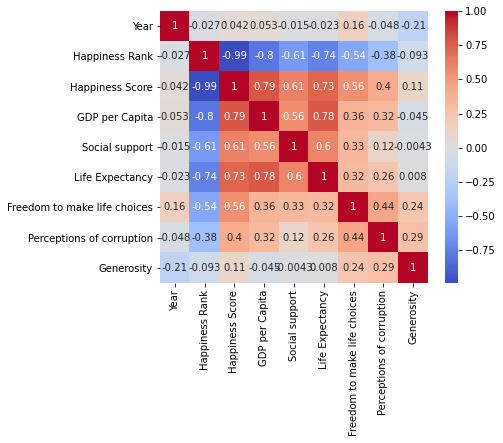

In [80]:
plt.figure(figsize=(6,5))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

- A better lifestyle and more spending power for leisure increase the happiness score.
- The higher life expectancy is the higher the score and that reflects how a good healthcare system assures a satisfied and healthy society.
- There is no linear relationship seen between perception of corruption & happiness score. The data points are a cluster on the left of the graph.Moreover, countries with less perception of corruption have a happiness score ranging from 2 to 8. The higher happiness scores must therefore be attributed to other factors other than how nations perceives their government to be corrupt or not. The correlation coefficient between them is 0.4. In essence the happiness score is less relied upon whether the nation perceives their government is corrupt or not.
- A society with a lot of opportunities in different fields as well possibly free education system and supportive entourage leads to a happier community.
- The scatter graph for the generosity vs happiness score is generally evenly distributed. Therefore it is enough to say that there is no relationship between the how generous citizen are with each other with the happiness score. This is supported by the correlation matrix which indicates that the correlation between generosity and happiness score is 0.11 which is insignificant. It might be more of a cultural thing.

# Lab 3 : Feature Selection <a class="anchor" id="chapter3"></a>

In [81]:
df = pd.read_csv("data.csv")

In [82]:
df.head()

,Unnamed: 0,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Social support,Life Expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,0,2015,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1,2015,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2,2015,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,3,2015,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,4,2015,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [83]:
df_copy = df.drop(df.columns[0], axis=1)

In [84]:
df_copy.head()

,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Social support,Life Expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,2015,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2015,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2015,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,2015,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,2015,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


Since we chose a data set with a numerical output (i.e. a regression problem) our data set lacks an categorical attribute class to be used in classification, so we'll start by creating one :

For now the simpest way to categorize the countries would be through the happiness rank as follows :
- 1st tier : 1-78
- 2nd tier : 79 - 158 

In [86]:
df2 = df_copy

In [88]:
df2.head()

,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Social support,Life Expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,2015,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2015,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2015,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,2015,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,2015,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [89]:
df2["tier"] = pd.cut(
    x=df["Happiness Rank"],
    bins=[0, 78, np.inf],
    labels=["First", "Second"])

In [90]:
df2.head()

,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Social support,Life Expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,tier
0,2015,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,First
1,2015,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,First
2,2015,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,First
3,2015,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,First
4,2015,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,First


In [91]:
df2.to_csv('final_2_cat.csv')

For this section, we'll be using several methods to nalyse most correlating features/attributes of the data set, generally and per class.

## Pearson Correlation Coefficient :
### General correlation between features :

In [93]:
df2['tier'] = df2['tier'].replace(['First','Second'],['1','2'])
df2['tier'] = df2['tier'].astype(float)

In [94]:
df2.corr()

<ipython-input-94-e0c6714eb3b3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,Year,Happiness Rank,Happiness Score,GDP per Capita,Social support,Life Expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,tier
Year,1.000000,-0.027489,0.042071,0.053239,-0.014533,-0.023341,0.162735,-0.047871,-0.212539,-0.016342
Happiness Rank,-0.027489,1.000000,-0.990732,-0.795188,-0.614313,-0.735869,-0.541468,-0.379082,-0.093002,0.865786
Happiness Score,0.042071,-0.990732,1.000000,0.789839,0.611541,0.730403,0.556573,0.403957,0.110412,-0.829089
GDP per Capita,0.053239,-0.795188,0.789839,1.000000,0.561409,0.777379,0.356818,0.316924,-0.045236,-0.687001
Social support,-0.014533,-0.614313,0.611541,0.561409,1.000000,0.597772,0.332123,0.117403,-0.004269,-0.537583
Life Expectancy,-0.023341,-0.735869,0.730403,0.777379,0.597772,1.000000,0.316124,0.259475,0.008015,-0.641380
Freedom to make life choices,0.162735,-0.541468,0.556573,0.356818,0.332123,0.316124,1.000000,0.443678,0.241746,-0.440338
Perceptions of corruption,-0.047871,-0.379082,0.403957,0.316924,0.117403,0.259475,0.443678,1.000000,0.287988,-0.274331
Generosity,-0.212539,-0.093002,0.110412,-0.045236,-0.004269,0.008015,0.241746,0.287988,1.000000,-0.023270
tier,-0.016342,0.865786,-0.829089,-0.687001,-0.537583,-0.641380,-0.440338,-0.274331,-0.023270,1.000000


### Correlation with the class attribute : 

In [99]:
df2.corr()["tier"].sort_values(ascending=True).abs()

<ipython-input-99-c87c169b8ca0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()["tier"].sort_values(ascending=True).abs()


Happiness Score                 0.829089
GDP per Capita                  0.687001
Life Expectancy                 0.641380
Social support                  0.537583
Freedom to make life choices    0.440338
Perceptions of corruption       0.274331
Generosity                      0.023270
Year                            0.016342
Happiness Rank                  0.865786
tier                            1.000000
Name: tier, dtype: float64

## PCA

In this method, we transform the data from high dimension space to low dimension space with minimal loss of information and also removing the redundancy in the dataset.

While applying PCA, the high dimension data is mapped into a number of components which is the input hyperparameter that should be provided. The number of components has to be less than equal to the dimension of the data. These components hold the information of the actual data in a different representation such that 1st component holds the maximum information followed by 2nd component and so on.

We'll drop the column "Country" as it hinders the Standardisation of the dataset :

In [101]:
df3= df2.drop('Country',axis=1)

In [135]:
X = df3.drop('tier',axis=1)
y = df3['tier']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [136]:
scaler = StandardScaler()
# Fit on training set only
X2 = scaler.fit_transform(X)

Let's check whether the normalized data has a mean of zero and a standard deviation of one /

In [137]:
np.mean(X2),np.std(X2)

(7.224995952591066e-16, 1.0)

Let's convert the normalized features into a tabular format with the help of DataFrame.

In [138]:
feat_cols = ['feature'+str(i) for i in range(X2.shape[1])]

In [139]:
normalised_df = pd.DataFrame(X2,columns=feat_cols)

In [140]:
normalised_df.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8
0,-1.344042,-1.719593,1.950619,1.156163,0.943577,1.402528,1.563207,2.727296,0.708028
1,-1.344042,-1.697291,1.927391,0.924798,1.100631,1.428679,1.323970,0.132927,1.874441
2,-1.344042,-1.674989,1.897015,0.981688,0.976555,1.130042,1.457956,3.321895,1.080976
3,-1.344042,-1.652687,1.892548,1.309661,0.888287,1.173165,1.590251,2.216961,1.127793
4,-1.344042,-1.630385,1.807675,0.983677,0.863442,1.256473,1.351274,1.886431,2.056776


Now we will be projecting the eight-dimensional data to two-dimensional principal components.

In [141]:
pca = PCA(n_components=2)
principalComponents_data = pca.fit_transform(X2)

Next, we create a DataFrame that will have the principal component values for all samples.

In [142]:
pca_df = pd.DataFrame(data = principalComponents_data
             , columns = ['principal component 1', 'principal component 2'])

In [143]:
pca_df.head()

,principal component 1,principal component 2
0,-4.128939,1.958308
1,-3.481636,1.441157
2,-4.043961,2.548546
3,-3.942446,2.032926
4,-3.694549,2.497108


**explained_variance_ratio**  provides the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.

In [144]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.48706062 0.1561574 ]


We can see that the principal component 1 holfd 48.7% of the information while the principal component 2 holds only 15.6% of the information. Also, the other point to note is that while projecting eight-dimensional data to a two-dimensional data, 35.7% information was lost.

Let's plot the visualization of the samples along the principal component - 1 and principal component - 2 axis, to have an insight into how the samples are distributed among the two classes.

<Figure size 432x288 with 0 Axes>

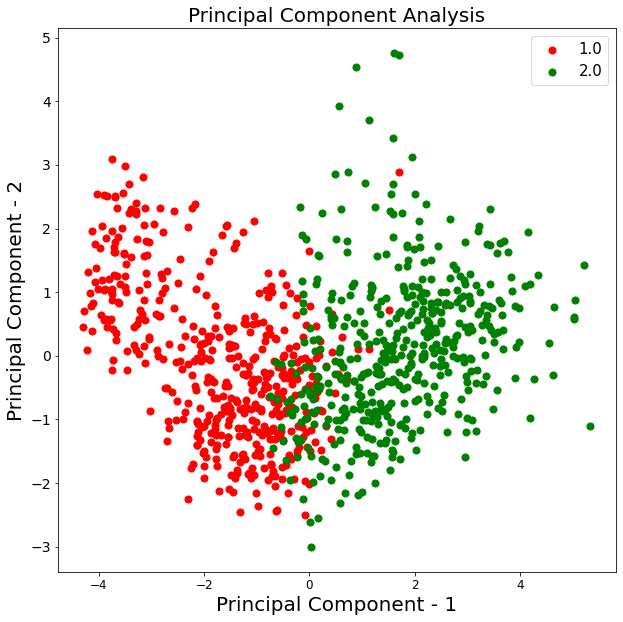

In [145]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis",fontsize=20)
targets = [1.0, 2.0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df3['tier'] == target
    plt.scatter(pca_df.loc[indicesToKeep, 'principal component 1']
               , pca_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

From the above graph, we can observe that the two classes, when projected to a two-dimensional space, can be linearly separable up to some extent. 

After some exploration it's time to use PCA for feature importance with feature importance technique. Let's use the logistic regression as a model for this :

In [146]:
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

[0.00561874 0.44528909 0.29408546 0.09150689 0.04840112 0.06094052
 0.02811422 0.01779323 0.00825073]


From the output, we can observe that there are scores for each attribute. The higher the score, higher is the importance of that attribute.

## Boruta feature selection :

It is a very useful algorithm that defines its own thresholds and provides us with the most accurate features from the provided dataset.

Boruta shuffles the provided input features (each feature column separately) and then concatenates these (called shadow features) with the original data. After this, the complete data set is trained using a Random Forest classifier. This classifier returns feature importance for the entire input. Boruta then sets the threshold as the strongest shuffled(shadow) feature.

Any real feature which has an importance level lower than the most important shuffled feature is dropped.


In [132]:
# install the package
#!pip install boruta

In [147]:
# we will use the randomforest algorithm
forest = RandomForestRegressor(n_jobs = -1,max_depth = 10)
# initialize boruta
boruta = BorutaPy(estimator = forest, n_estimators = 'auto',max_iter = 50,)
# Boruta accepts np.array 
boruta.fit(np.array(X), np.array(y))
# get results
green_area = X.columns[boruta.support_].to_list()
blue_area = X.columns[boruta.support_weak_].to_list()
print('Selected Features:', green_area)
print('Blue area features:', blue_area)

Selected Features: ['Happiness Rank']
Blue area features: []


So out of the original features, Boruta believes that only the one featurs returned is the most important feature to make any reasonable decision.

## Feature Selection using Statistical Tests :

In [149]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [150]:
reg.coef_

array([-0.00224356,  0.02656866,  0.68822876,  0.01601564, -0.01706238,
       -0.029783  , -0.03617033,  0.01762455,  0.1195371 ])

In [151]:
reg.intercept_

0.2383192682994295

In [152]:
#R-squared
reg.score(X,y)

0.7953705115482174

### Adjusted R^2

$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [153]:
r2 = reg.score(X,y)
n = X.shape[0]
p = X.shape[1]

adjusted_r2 = 1 -(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7933708748532489

In [155]:
f_regression(X,y)

(array([2.48178643e-01, 2.78086024e+03, 2.04273343e+03, 8.30372200e+02,
        3.77602382e+02, 6.49236466e+02, 2.23458704e+02, 7.56037624e+01,
        5.03309932e-01]),
 array([6.18478393e-001, 1.43537833e-281, 8.49623040e-237, 5.68817798e-131,
        7.60148008e-071, 5.03971319e-109, 1.95175348e-045, 1.55131812e-017,
        4.78227378e-001]))

In [156]:
p_values = f_regression(X,y)[1]b

In [157]:
p_values

array([6.18478393e-001, 1.43537833e-281, 8.49623040e-237, 5.68817798e-131,
       7.60148008e-071, 5.03971319e-109, 1.95175348e-045, 1.55131812e-017,
       4.78227378e-001])

### Summary table of statistics :

In [158]:
reg_summary = pd.DataFrame(data = X.columns.values, columns=['Features'])
reg_summary['Coefficients'] = reg.coef_
reg_summary['p-values'] = p_values

In [159]:
reg_summary

,Features,Coefficients,p-values
0,Year,-0.002244,6.184784e-01
1,Happiness Rank,0.026569,1.435378e-281
2,Happiness Score,0.688229,8.496230e-237
3,GDP per Capita,0.016016,5.688178e-131
4,Social support,-0.017062,7.601480e-71
5,Life Expectancy,-0.029783,5.039713e-109
6,Freedom to make life choices,-0.036170,1.951753e-45
7,Perceptions of corruption,0.017625,1.551318e-17
8,Generosity,0.119537,4.782274e-01


The features with the p-values lower than 0.5 are useful so all besides Year

## mRMR feature selection :

MRMR stands for Maximum Relevance Minimum Redundancy. While Boruta looks amongst the features to find the most important ones, MRMR makes sure that the features selected are not only the ones that provide minimum correlation between the input features but also have a high correlation with the output variable.

MRMR works iteratively, it first asks you how many features you want to keep, and then for every iteration it calculates 1 feature that is most relevant to the output variable and least related to any of the features in our dataset. Once a feature is selected it is removed from the original dataset and the next iteration begins until K (the number of features we require) iterations are completed.

In [160]:
#!pip install mrmr_selection

In [162]:
#K : the number of features we want 
# top 3 features
top_3 = mrmr_classif(X=X, y=y, K=3)
# top 5 features
top_5 = mrmr_classif(X=X, y=y, K=5)
# top 6 features
top_6 = mrmr_classif(X=X, y=y, K=6)
print("Best 3 features:", top_3)
print("Best 5 features:", top_5)
print("Best 6 features:", top_6)

100%|██████████| 6/6 [00:01<00:00,  3.59it/s]

Best 3 features: ['Happiness Rank', 'Happiness Score', 'GDP per Capita']
Best 5 features: ['Happiness Rank', 'Happiness Score', 'GDP per Capita', 'Life Expectancy', 'Social support']
Best 6 features: ['Happiness Rank', 'Happiness Score', 'GDP per Capita', 'Life Expectancy', 'Social support', 'Freedom to make life choices']


Going by MRMR we'll end up with the following sub-datasets :

In [163]:
data1 = df3[['Happiness Rank', 'Happiness Score', 'GDP per Capita']].copy()
data2 =df3[['Happiness Rank', 'Happiness Score', 'GDP per Capita', 'Life Expectancy', 'Social support']].copy()
data3 =df3[['Happiness Rank', 'Happiness Score', 'GDP per Capita', 'Life Expectancy', 'Social support', 'Freedom to make life choices']].copy()

In [164]:
data1.head()

,Happiness Rank,Happiness Score,GDP per Capita
0,1,7.587,1.39651
1,2,7.561,1.30232
2,3,7.527,1.32548
3,4,7.522,1.45900
4,5,7.427,1.32629


In [165]:
data2.head()

,Happiness Rank,Happiness Score,GDP per Capita,Life Expectancy,Social support
0,1,7.587,1.39651,0.94143,1.34951
1,2,7.561,1.30232,0.94784,1.40223
2,3,7.527,1.32548,0.87464,1.36058
3,4,7.522,1.45900,0.88521,1.33095
4,5,7.427,1.32629,0.90563,1.32261


In [166]:
data3.head()

,Happiness Rank,Happiness Score,GDP per Capita,Life Expectancy,Social support,Freedom to make life choices
0,1,7.587,1.39651,0.94143,1.34951,0.66557
1,2,7.561,1.30232,0.94784,1.40223,0.62877
2,3,7.527,1.32548,0.87464,1.36058,0.64938
3,4,7.522,1.45900,0.88521,1.33095,0.66973
4,5,7.427,1.32629,0.90563,1.32261,0.63297


### Comparaison of accuracy between original dataset and sub-datasets : 
To evaluate whether the smaller data sets (with selected features) work better, we run a classifier
on the original and smaller data sets, and then compare their accuracy :

In [167]:
#original dataset
X = df3.drop('tier',axis=1)
y = df3['tier']
#data with top 3 features 
X3 = data1
y3 = df3['tier']
#data with top 5 features
X5 = data2
y5 = df3['tier']
#data with top 6 features
X6 = data3
y6 = df3['tier']

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.20) 
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.20) 
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.20) 

#### Original dataset

In [171]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

#### Top 3 features dataset :

In [172]:
classifier.fit(X_train3, y_train3)
# Predict y data with classifier: 
y_pred3 = classifier.predict(X_test3)
accuracy_score(y_test3, y_pred3)

1.0

#### Top 5 features dataset :

In [173]:
classifier.fit(X_train5, y_train5)
y_pred5 = classifier.predict(X_test5)
accuracy_score(y_test5, y_pred5)

1.0

#### Top 6 features dataset :

In [174]:
classifier.fit(X_train6, y_train6)
y_pred6 = classifier.predict(X_test6)
accuracy_score(y_test6, y_pred6)

1.0

The perfect accuracy scores for classfication accross all expirements leads us to doubt if there is overfitting  dut to the column "Happiness Rank" that was used to determine the tiers and the column "Happiness Score" that is heavily correlated to the "Happiness Rank", the fact that the Boruta algorithm only chose Happiness Rank as an important feature further proves this theory. 